Car Detection pipeline 
===



In [6]:
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
import os

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split

import features
from pipeline import slide_window

[MoviePy] >>>> Building video output_images/output.mp4
[MoviePy] Writing video output_images/output.mp4


100%|█████████▉| 1260/1261 [06:08<00:00,  3.80it/s]    | 1/1261 [00:00<07:09,  2.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_images/output.mp4 



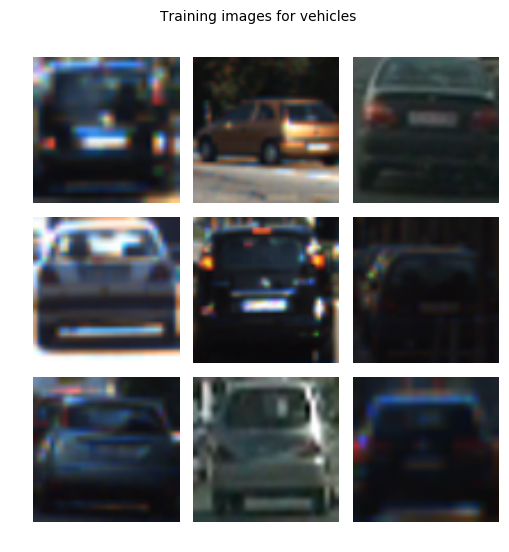

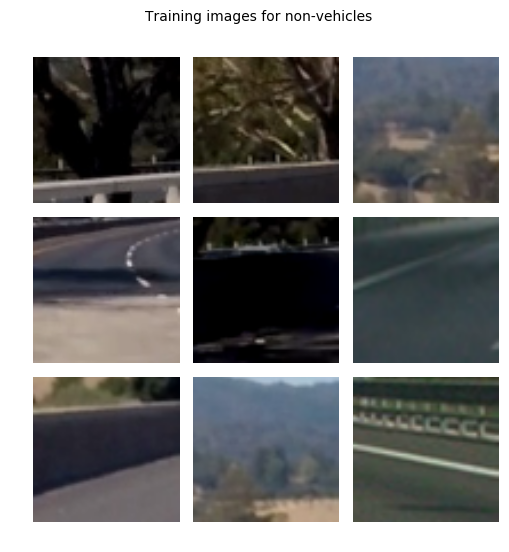

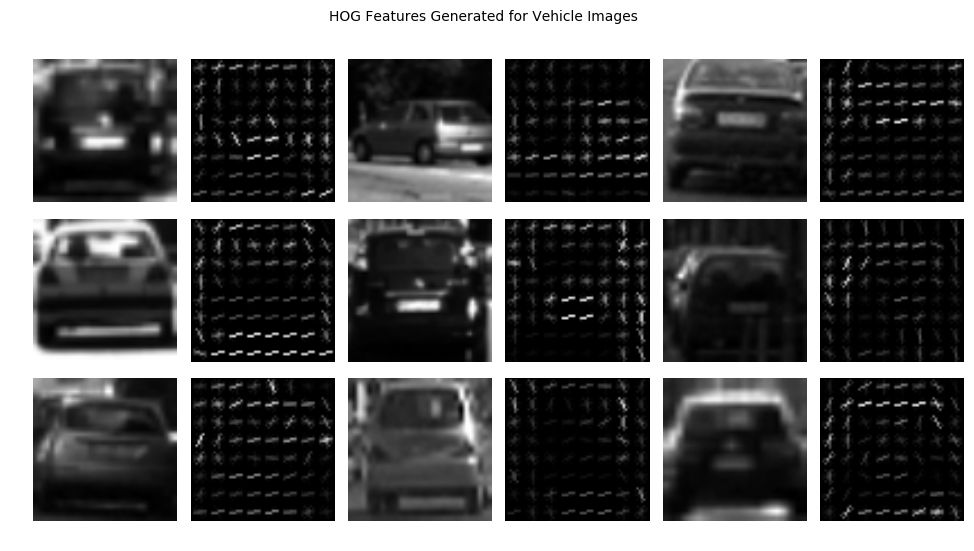

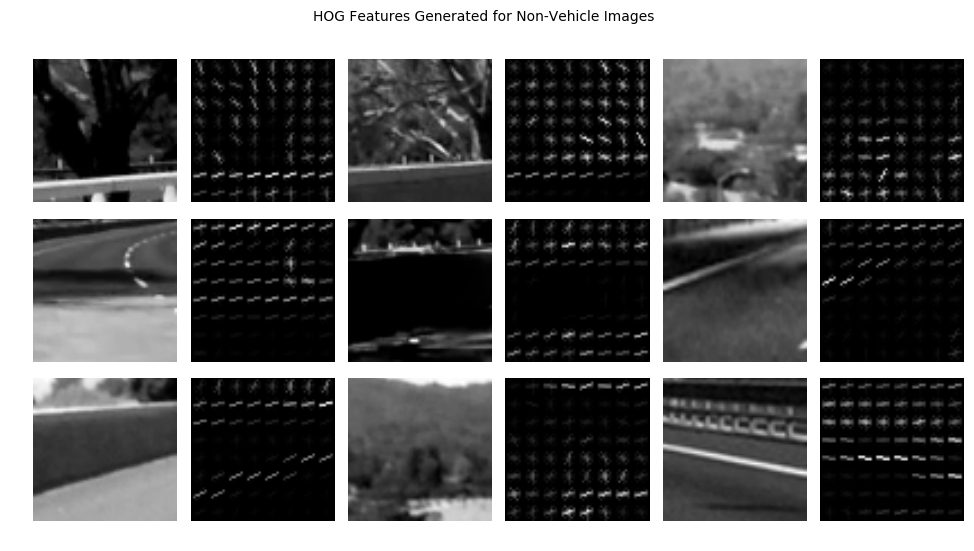

In [4]:
def extract_files(directory, extn="png"):
    file_list=[]
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extn):
                file_list.append(os.path.join(root, file))
    return file_list


def display_random_files(image_files, num_of_images=12, images_per_row=6, main_title=None):
    random_files = np.random.choice(image_files, num_of_images)
    images = []
    for random_file in random_files:
        images.append(mpimg.imread(random_file))

    grid_space = gridspec.GridSpec(num_of_images// images_per_row, images_per_row)
    grid_space.update(wspace=0.1, hspace=0.1)
    plt.figure(figsize=(images_per_row*2, (num_of_images // images_per_row)*2))

    for index in range(0, num_of_images):
        axis_1 = plt.subplot(grid_space[index])
        axis_1.axis('off')
        axis_1.imshow(images[index])

    if main_title is not None:
        plt.suptitle(main_title)
        plt.savefig("./output_images/{}".format(main_title.replace(" ", "_")))

    plt.show()
    return images

def calculate_show_hog_features(images):
    hog_images=[]
    hog_features=[]
    
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        orient = 9
        pix_per_cell = 8
        cell_per_block = 2
        _, hog_image = features.get_hog_features(gray, orient, 
                    pix_per_cell, cell_per_block, 
                    vis=True, feature_vec=False)
        hog_images.append(gray)
        hog_features.append(hog_image)
    return(hog_images, hog_features)

def visualize_hog_features(hog_images, hog_features,num_of_images=9, images_per_row=3, color_map='gray', main_title=''):
    grid_space = gridspec.GridSpec(len(hog_images)//images_per_row, images_per_row*2)
    grid_space.update(wspace=0.1, hspace=0.1)
    plt.figure(figsize=(images_per_row*2*2, (num_of_images*2 // images_per_row)))

    for index in range(0, len(hog_images)*2, 2):
        axis_1 = plt.subplot(grid_space[index])
        axis_1.axis('off')
        axis_1.imshow(hog_images[index//2], cmap=color_map)

        axis_1 = plt.subplot(grid_space[index+1])
        axis_1.axis('off')
        axis_1.imshow(hog_features[index//2], cmap=color_map)
    
    if main_title is not None:
        plt.suptitle(main_title)
        plt.savefig("./output_images/{}".format(main_title.replace(" ", "_")))

    plt.show()
        

vehicle_files_dir = './vehicles/'
non_vehicle_files_dir = './non-vehicles/'

vehicles_files = extract_files(vehicle_files_dir)
non_vehicles_files = extract_files(non_vehicle_files_dir)

random_vehicle_imgs = display_random_files(vehicles_files, num_of_images=9, images_per_row=3, main_title="Training images for vehicles")
random_non_vehicle_imgs = display_random_files(non_vehicles_files, num_of_images=9, images_per_row=3, main_title="Training images for non-vehicles")

vehicle_images, vehicle_features = calculate_show_hog_features(random_vehicle_imgs)
non_vehicle_images, non_vehicle_features = calculate_show_hog_features(random_non_vehicle_imgs)


visualize_hog_features(vehicle_images, vehicle_features, main_title='HOG Features Generated for Vehicle Images')
visualize_hog_features(non_vehicle_images, non_vehicle_features, main_title='HOG Features Generated for Non-Vehicle Images')


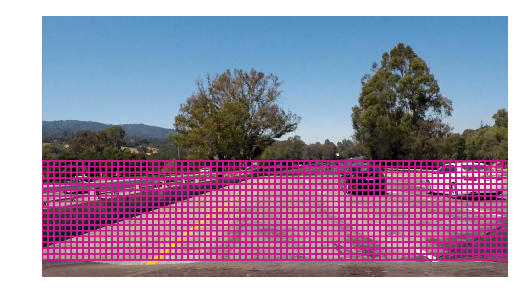

In [15]:
img_path = './test_images/test1.jpg'
image = mpimg.imread(img_path)
copy_image = np.copy(image)

windows = slide_window(copy_image, xy_window=(64, 64), xy_overlap=(0.75, 0.75), y_start_stop=[400, 680])
for window in windows:
        cv2.rectangle(copy_image, window[0], window[1], (197, 27, 138), 3)
plt.imshow(copy_image)
plt.axis("off")
plt.savefig("./output_images/{}".format("slide_windows_test1.png"))
plt.show()
